# Car auction price estimation

## Introduction

This notebook describes an estimation of car auction bid prices for auctions on the car dealer site KVD https://www.kvd.se/auktion/personbil

Auction data is extracted from the KVD site using the GitHub project at https://github.com/fredriksoderberg/auction-analysis/tree/master/auction_data  

### Data cleaning

In [350]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [351]:
data = pd.read_csv('kvd_auction_20160404.csv', index_col = 0)

Extract data subset (highest bid, estimated action price) 

In [352]:
datasubset = data[['highest_bid', 'estimated_auction_price']]

Remove non digits from price data.

In [354]:
datasubset = datasubset.replace(to_replace=r'[a-z.]|[A-Z]| ', value=r'', regex=True)

Remove rows with empty data.

In [355]:
datasubset.dropna()
datasubset = datasubset[datasubset.estimated_auction_price != '']

Extraction of estimated auction price ranges.

In [356]:
datasubset['est_auction_price_low'] = datasubset['estimated_auction_price'].str.split('-').str[0]
datasubset['est_auction_price_high'] = datasubset['estimated_auction_price'].str.split('-').str[1]

Cast to integer datatype 

In [357]:
datasubset['highest_bid'] = datasubset['highest_bid'].astype(int)
datasubset['est_auction_price_low'] = datasubset['est_auction_price_low'].astype(int)
datasubset['est_auction_price_high'] = datasubset['est_auction_price_high'].astype(int)

### Accuracy of estimated auction prices

Calculate average estimated auction prices

In [358]:
datasubset['avg_est_auction_price'] = datasubset[['est_auction_price_low', 'est_auction_price_high']].mean(axis=1)

Calculate average deviation from (avg) estimated auction price. Get the mean over all auctions.

In [371]:
datasubset['est_auction_price_error'] = \
datasubset['highest_bid'].sub(datasubset['avg_est_auction_price'], axis=0).div(datasubset['avg_est_auction_price'], axis=0).abs()
datasubset['est_auction_price_error'].mean()

0.08683623661995511

Plot

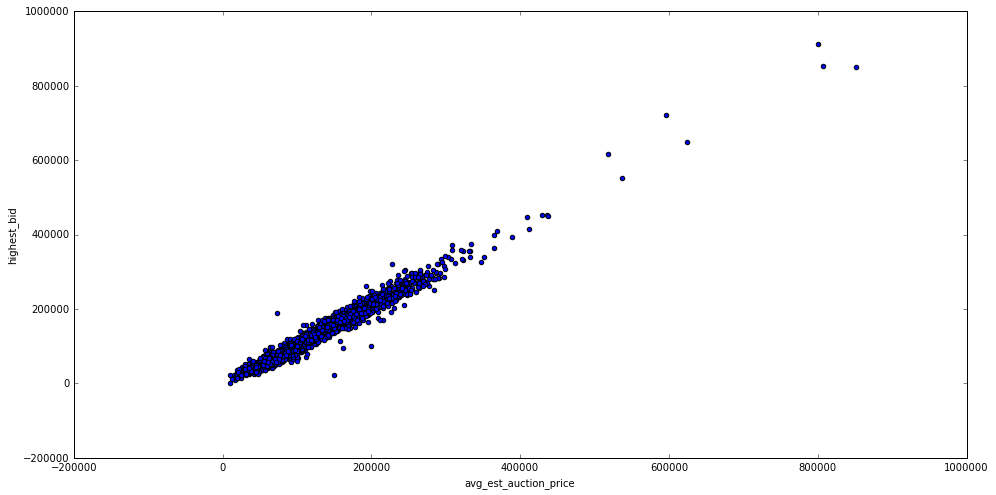

In [359]:
datasubset.plot(kind='scatter', x='avg_est_auction_price', y='highest_bid', figsize=(16,8))

### Estimation (Linear regression)

In [372]:
data.head()

,auction_URL,car_model,description,place_of_sale,estimated_auction_price,estimated_dealership_price,buyer_fee,auction_start,examiner_comment,equipment,...,export_allowed,new_car_price,nr_of_keys,import_type,created,object_number.1,auction_date,bidder,highest_bid,created.1
object_number,,,,,,,,,,,,,,,,,,,,,
713531,https://www.kvd.se/auktion/personbil/VW/Passat...,VW Passat,"1.4 TSI EcoFuel Variant (Aut, Helläder, 150hk)...",Malmö,42 000 kr - 52 000 kr,61 200 kr,3 125 kr,3/4 20:10,Kombi från Volkswagen med miljöklassad gasmoto...,"Klimatanläggning , Automat med möjlighet att v...",...,Ja,294 000 kr,2,Svensksåld,2016-03-31 04:15:27.614622+00,713531,2016-04-03,rs001,46 500 kr,2016-04-04 04:14:05.820771+00
711281,https://www.kvd.se/auktion/personbil/Toyota/iQ...,Toyota iQ,1.0 (68hk) -09,Kungälv,38 269 kr - 49 049 kr,53 900 kr,3 125 kr,3/4 20:12,Toyota iQ utrustad med driftsnål motor på 68hk...,"AC , ABS , Antisladdsystem , Fjärrlås , Motorv...",...,Ja,150 000 kr,2,Svensksåld,2016-03-31 04:15:24.984741+00,711281,2016-04-03,CarBuyerJ,35 101 kr,2016-04-04 04:14:18.898717+00
713373,https://www.kvd.se/auktion/personbil/Toyota/Au...,Toyota Auris,"1.6 VVT-i (Aut, 132hk) -09",Åkersberga,38 198 kr - 48 958 kr,53 800 kr,3 125 kr,3/4 20:14,"Auris, en trevlig och populär mellanklassmodel...","Klimatanläggning , Automat med möjlighet att v...",...,Ja,168 000 kr,3,Svensksåld,2016-03-31 04:15:23.703849+00,713373,2016-04-03,rodan2009,50 000 kr,2016-04-04 04:14:01.535805+00
708665,https://www.kvd.se/auktion/personbil/Volvo/V40...,Volvo V40,"D2 (Aut, 115hk)(Rep.objekt) -15",Växjö,24 000 kr - 28 750 kr,194 600 kr,3 125 kr,3/4 20:16,"Volvo V40 som säljes som reparationsobjekt, se...","Automat med möjlighet att växla manuellt , ABS...",...,Ja,242 000 kr,1,Svensksåld,2016-03-31 04:15:19.49412+00,708665,2016-04-03,juliatal,44 000 kr,2016-04-04 04:14:05.734501+00
712178,https://www.kvd.se/auktion/personbil/Toyota/Ve...,Toyota Verso,"S 1.33 (Aut, Backkamera, 99hk) -13",Åkersberga,35 642 kr - 45 682 kr,50 200 kr,3 125 kr,3/4 20:18,Toyota Verso utrustad med automatlåda och back...,"AC , Automat med möjlighet att växla manuellt ...",...,Ja,182 000 kr,2,Svensksåld,2016-03-31 04:15:17.429783+00,712178,2016-04-03,bilkompanietuppsala,47 211 kr,2016-04-04 04:14:05.825906+00


In [ ]:
datasubset